# Laboratory work 15
## Solar image processing to determine the angular velocity of EUV coronal wave 
## Group 1: Viktor Liviniuk, Alina Liviniuk
## Skoltech
## 2017

The objective of this laboratory work is to apply gained skills during the term to determine angular velocity of EUV wave in the solar corona by processing solar images. This problem is very important for space weather applications.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
ro = np.loadtxt('data for lab/Ascii/ro.txt')
phi = np.loadtxt('data for lab/Ascii/fi.txt')

In [3]:
image1 = np.loadtxt('data for lab/Ascii/Image1.txt')
image2 = np.loadtxt('data for lab/Ascii/Image2.txt')
image3 = np.loadtxt('data for lab/Ascii/Image3.txt')
image4 = np.loadtxt('data for lab/Ascii/Image4.txt')

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Show images

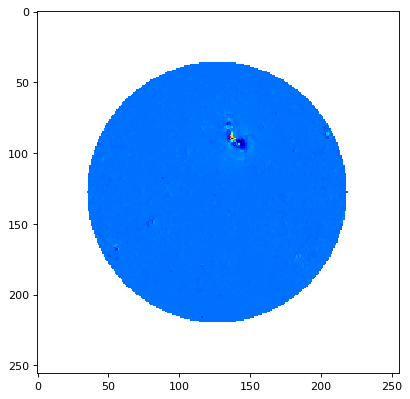

In [5]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image1)
plt.set_cmap('jet')
plt.show()

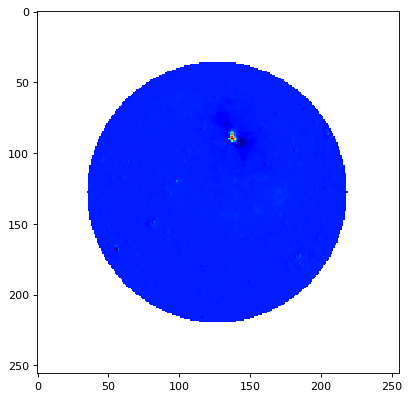

In [6]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image2)
plt.set_cmap('jet')
plt.show()

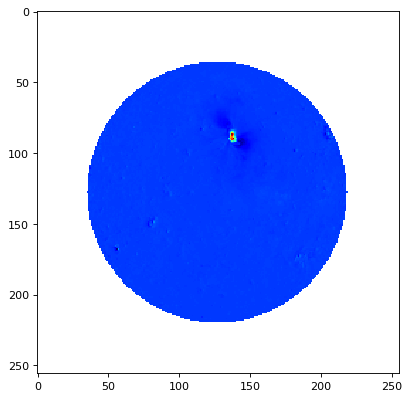

In [7]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image3)
plt.set_cmap('jet')
plt.show()

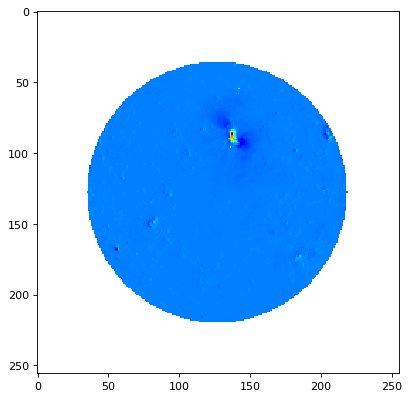

In [8]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image4)
plt.set_cmap('jet')
plt.show()

Load boundaries

In [9]:
borders1 = np.loadtxt('data for lab/Ascii/borders1.txt')
borders2 = np.loadtxt('data for lab/Ascii/borders2.txt')
borders3 = np.loadtxt('data for lab/Ascii/borders3.txt')
borders4 = np.loadtxt('data for lab/Ascii/borders4.txt')

In [10]:
# image sizes
m = image1.shape[0]
n = image1.shape[1]

In [11]:
for i in range(n):
    for j in range(m):
        if (ro[i,j] < borders1[0] or ro[i,j] > borders1[1]):
            image1[i,j] = np.nan
        if (ro[i,j] < borders2[0] or ro[i,j] > borders2[1]):
            image2[i,j] = np.nan
        if (ro[i,j] < borders3[0] or ro[i,j] > borders3[1]):
            image3[i,j] = np.nan
        if (ro[i,j] < borders4[0] or ro[i,j] > borders4[1]):
            image4[i,j] = np.nan

Show EUV waves

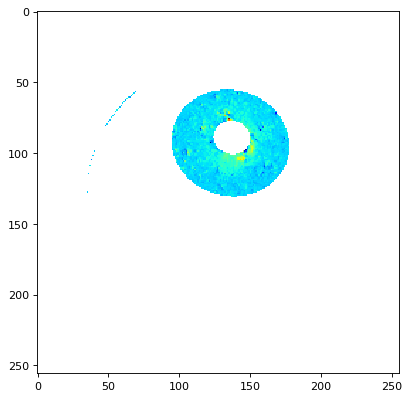

In [12]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image1)
plt.set_cmap('jet')
plt.show()

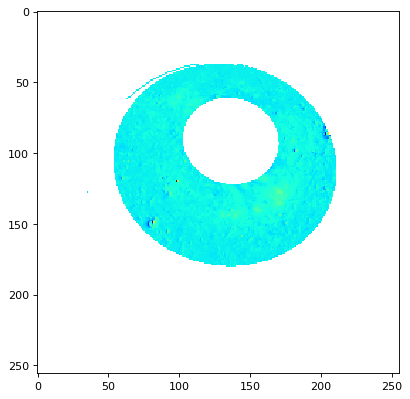

In [13]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image2)
plt.set_cmap('jet')
plt.show()

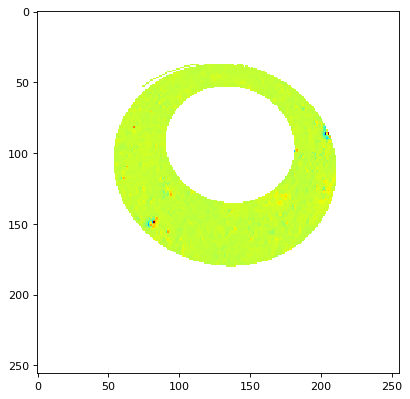

In [14]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image3)
plt.set_cmap('jet')
plt.show()

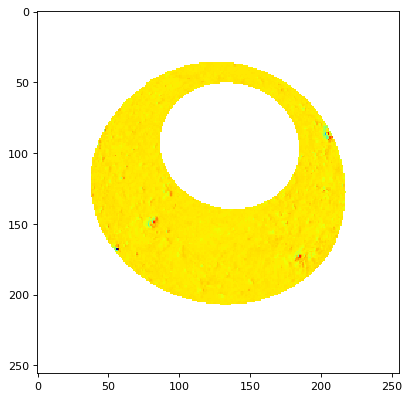

In [15]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(image4)
plt.set_cmap('jet')
plt.show()

Plot dependence of intensity of a pixel belonging to EUV wave front on angle for every image

In [16]:
def intensity_phi(phi, image):
    image_size1 = phi[0].size
    image_size2 = phi[1].size
    n_pixels = 0
    for i in range(image_size1):
        for j in range(image_size2):
            if not np.isnan(image[i,j]):
                n_pixels += 1
    intensity_by_phi = np.zeros((2, n_pixels))
    k = 0
    for i in range(image_size1):
        for j in range(image_size2):
            if not np.isnan(image[i,j]):
                intensity_by_phi[0, k] = phi[i,j]
                intensity_by_phi[1, k] = image[i,j]
                k += 1
    # sorting
    intensity_by_phi = intensity_by_phi[:,np.argsort(intensity_by_phi[0])]
    return intensity_by_phi

In [17]:
intensity_by_phi1 = intensity_phi(phi, image1)
intensity_by_phi2 = intensity_phi(phi, image2)
intensity_by_phi3 = intensity_phi(phi, image3)
intensity_by_phi4 = intensity_phi(phi, image4)

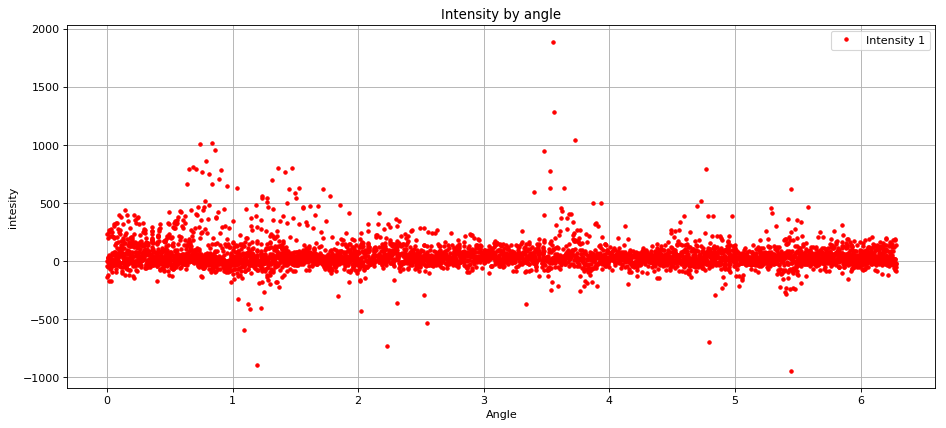

In [18]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
#plt.plot(intensity_by_phi1[0], intensity_by_phi1[1], 'r-', label = "Intensity 1")
plt.plot(intensity_by_phi1[0], intensity_by_phi1[1], 'r.', label = "Intensity 1")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

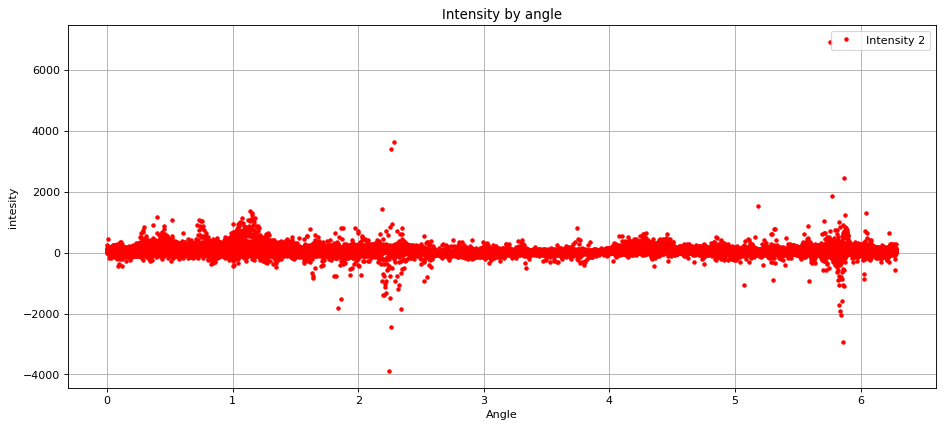

In [19]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
#plt.plot(intensity_by_phi2[0], intensity_by_phi2[1], 'r-', label = "Intensity 2")
plt.plot(intensity_by_phi2[0], intensity_by_phi2[1], 'r.', label = "Intensity 2")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

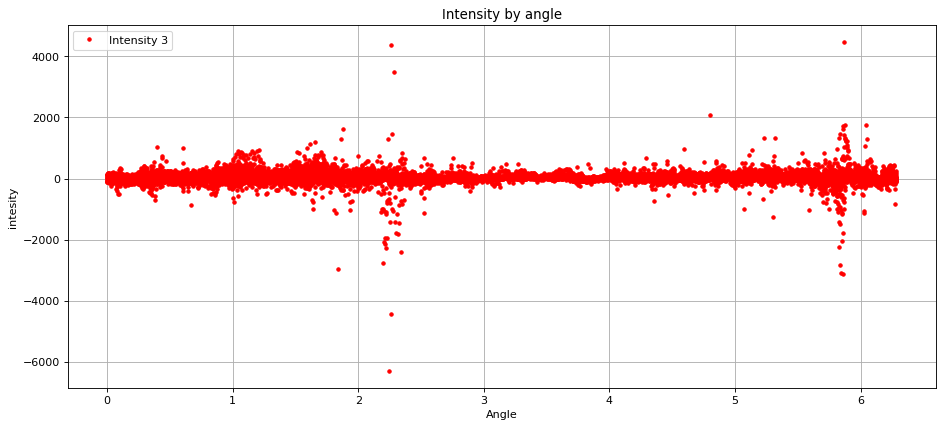

In [20]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
#plt.plot(intensity_by_phi3[0], intensity_by_phi3[1], 'r-', label = "Intensity 3")
plt.plot(intensity_by_phi3[0], intensity_by_phi3[1], 'r.', label = "Intensity 3")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

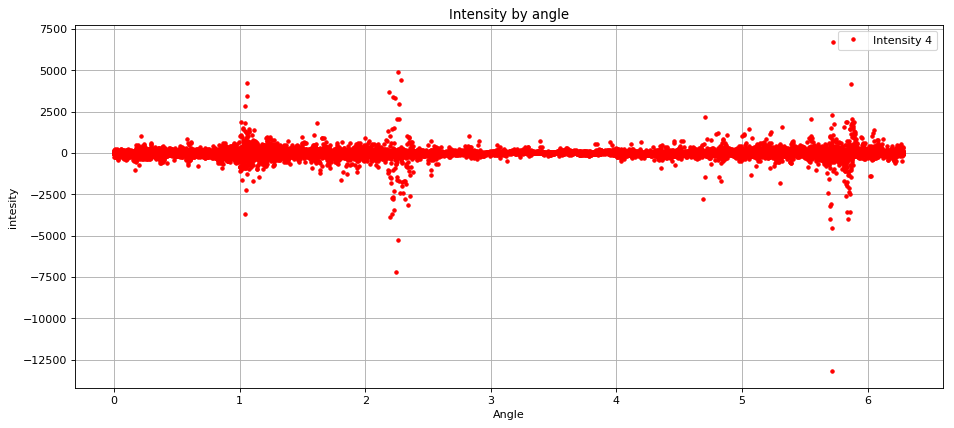

In [21]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
#plt.plot(intensity_by_phi4[0], intensity_by_phi4[1], 'r-', label = "Intensity 4")
plt.plot(intensity_by_phi4[0], intensity_by_phi4[1], 'r.', label = "Intensity 4")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

Make smoothing of the dependence obtained

I apply running mean to beginning and end intervals same way as I do with other elements, rather than just sum up whatever I have on these intervals. 

In [22]:
def smooth(intensity_by_phi_input):
    intensity_by_phi = np.copy(intensity_by_phi_input)
    N = intensity_by_phi[0].size
    L = np.pi / 16
    #kinda running mean
    for i in range(N):
        k1 = k2 = i
        s = 0
        while ((k1 > 0) and (intensity_by_phi_input[0,k1-1] > intensity_by_phi_input[0,i] - L)) or ((k1 <= 0) and (intensity_by_phi_input[0,k1-1] > 2*np.pi + intensity_by_phi_input[0,i] - L)):
            k1 -= 1
            s += intensity_by_phi_input[1,k1]
        while ((k2 < N) and (intensity_by_phi_input[0,k2] < intensity_by_phi_input[0,i] + L)):
            s += intensity_by_phi_input[1,k2]
            k2 += 1
        while ((k2 >= N) and (intensity_by_phi_input[0,k2-N] + 2*np.pi < intensity_by_phi_input[0,i] + L)):
            s += intensity_by_phi_input[1,k2-N]
            k2 += 1
        intensity_by_phi[1,i] = s
    return intensity_by_phi

The following funktion does as instructed, but I do not use it (I use the previous one)

In [23]:
def smooth2(intensity_by_phi_input):
    intensity_by_phi = np.copy(intensity_by_phi_input)
    N = intensity_by_phi[0].size
    L = np.pi / 16
    #[0:L] -> sum
    first = 0
    s = 0
    while (intensity_by_phi_input[0,first] <= L):
        s += intensity_by_phi_input[1,first]
        first += 1
    for i in range(first):
        intensity_by_phi[1,i] = s
    #[2pi-L,2pi] -> sum
    last = N
    s = 0
    while (intensity_by_phi_input[0,last-1] >= 2*np.pi - L):
        s += intensity_by_phi_input[1,last-1]
        last -= 1
    for i in range(last, N):
        intensity_by_phi[1,last] = s
    #kinda running mean
    for i in range(first, last):
        k1 = k2 = i
        s = 0
        while ((k1 > 0) and (intensity_by_phi_input[0,k1-1] > intensity_by_phi_input[0,i] - L)):
            k1 -= 1
            s += intensity_by_phi_input[1,k1]
        while ((k2 < N) and (intensity_by_phi_input[0,k2] < intensity_by_phi_input[0,i] + L)):
            s += intensity_by_phi_input[1,k2]
            k2 += 1
        intensity_by_phi[1,i] = s
    return intensity_by_phi

In [24]:
intensity_smoothed1 = smooth(intensity_by_phi1)
intensity_smoothed2 = smooth(intensity_by_phi2)
intensity_smoothed3 = smooth(intensity_by_phi3)
intensity_smoothed4 = smooth(intensity_by_phi4)

Plot Smoothing results

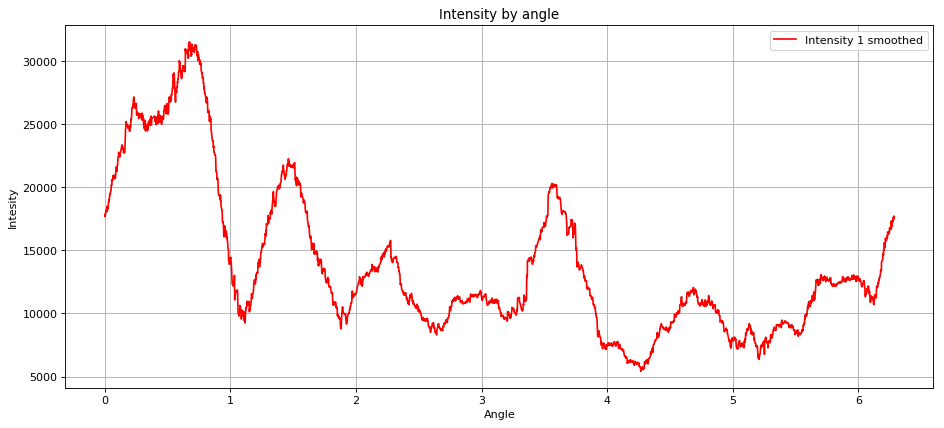

In [25]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(intensity_smoothed1[0], intensity_smoothed1[1], 'r-', label = "Intensity 1 smoothed")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('Intesity')
plt.show()

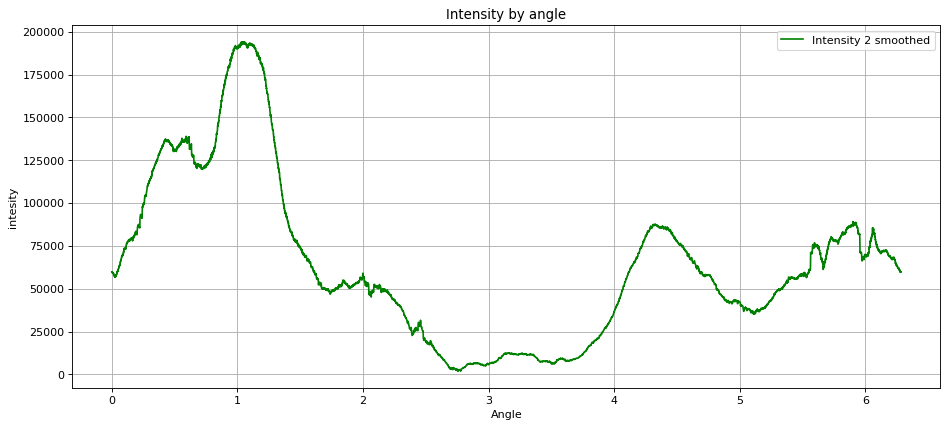

In [26]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(intensity_smoothed2[0], intensity_smoothed2[1], 'g-', label = "Intensity 2 smoothed")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

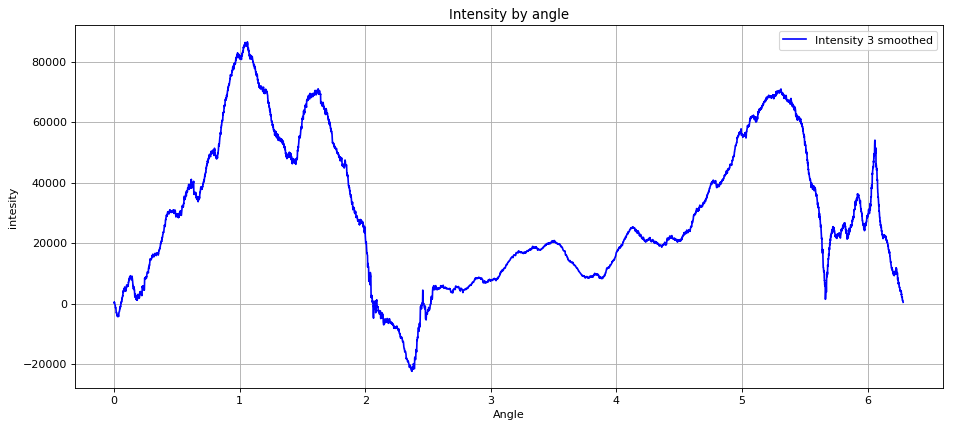

In [27]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(intensity_smoothed3[0], intensity_smoothed3[1], 'b-', label = "Intensity 3 smoothed")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

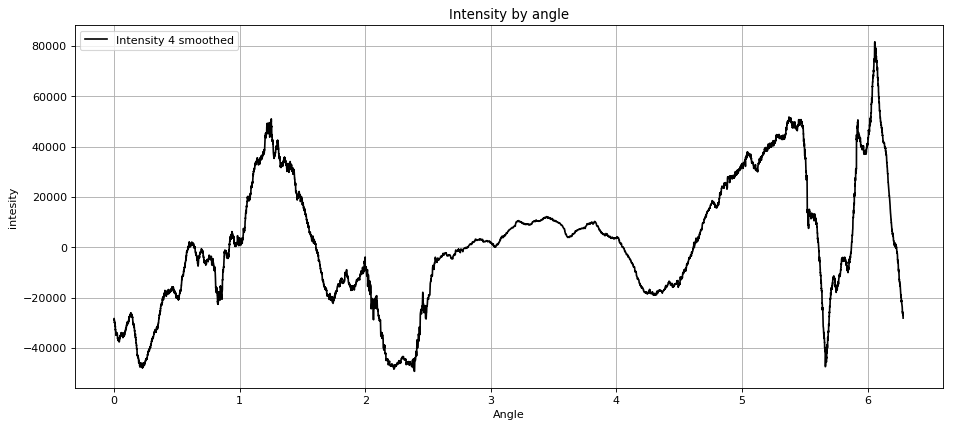

In [28]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(intensity_smoothed4[0], intensity_smoothed4[1], 'k-', label = "Intensity 4 smoothed")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

Process smoothing result

In [29]:
def process_sm_res(intensity_by_phi_input):
    intensity_by_phi = np.copy(intensity_by_phi_input)
    N = intensity_by_phi[0].size
    for i in range(N):
        if (intensity_by_phi[1][i] < 0) or (intensity_by_phi[0][i] > 2 and intensity_by_phi[0][i] < 4):
            intensity_by_phi[1][i] = 0
    return intensity_by_phi

In [30]:
intensity_smoothed1_ = process_sm_res(intensity_smoothed1)
intensity_smoothed2_ = process_sm_res(intensity_smoothed2)
intensity_smoothed3_ = process_sm_res(intensity_smoothed3)
intensity_smoothed4_ = process_sm_res(intensity_smoothed4)

Plot results

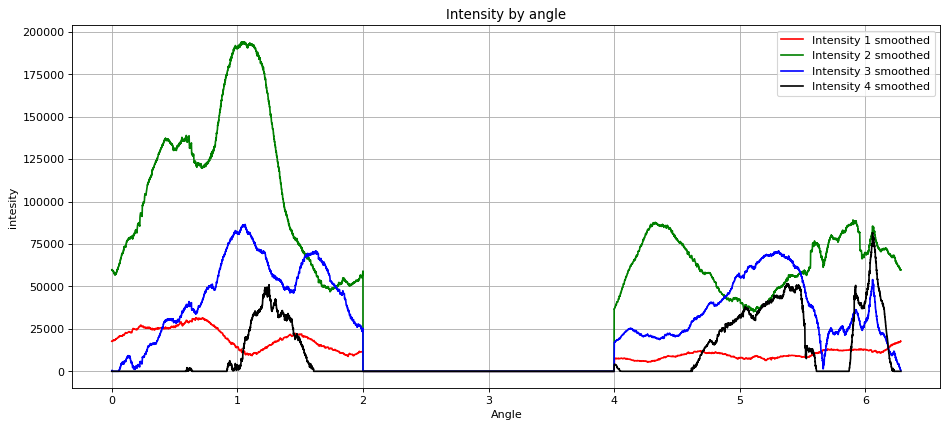

In [31]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(intensity_smoothed1_[0], intensity_smoothed1_[1], 'r-', label = "Intensity 1 smoothed")
plt.plot(intensity_smoothed2_[0], intensity_smoothed2_[1], 'g-', label = "Intensity 2 smoothed")
plt.plot(intensity_smoothed3_[0], intensity_smoothed3_[1], 'b-', label = "Intensity 3 smoothed")
plt.plot(intensity_smoothed4_[0], intensity_smoothed4_[1], 'k-', label = "Intensity 4 smoothed")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

Some more editing

In [32]:
def shift(intensity_smoothed):
    N = intensity_smoothed[0].size
    k1 = 0
    while (intensity_smoothed[0][k1] < 2):
        k1 += 1
    k2 = 0
    while (intensity_smoothed[0][k2] < 4):
        k2 += 1
    intensity_smoothed_final = np.zeros((2, N - k2 + k1))
    for i in range(k2,N):
        intensity_smoothed_final[0,i-k2] = intensity_smoothed[0,i] - 2*np.pi
        intensity_smoothed_final[1,i-k2] = intensity_smoothed[1,i]
    for i in range(k1):
        intensity_smoothed_final[0,N-k2+i] = intensity_smoothed[0,i]
        intensity_smoothed_final[1,N-k2+i] = intensity_smoothed[1,i]
    return intensity_smoothed_final

In [33]:
intensity_smoothed_final1 = shift(intensity_smoothed1_)
intensity_smoothed_final2 = shift(intensity_smoothed2_)
intensity_smoothed_final3 = shift(intensity_smoothed3_)
intensity_smoothed_final4 = shift(intensity_smoothed4_)

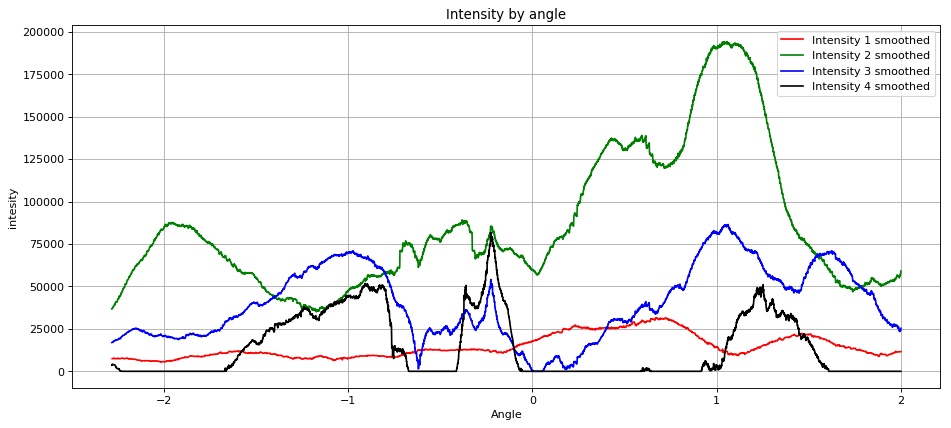

In [34]:
# Plot
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(intensity_smoothed_final1[0], intensity_smoothed_final1[1], 'r-', label = "Intensity 1 smoothed")
plt.plot(intensity_smoothed_final2[0], intensity_smoothed_final2[1], 'g-', label = "Intensity 2 smoothed")
plt.plot(intensity_smoothed_final3[0], intensity_smoothed_final3[1], 'b-', label = "Intensity 3 smoothed")
plt.plot(intensity_smoothed_final4[0], intensity_smoothed_final4[1], 'k-', label = "Intensity 4 smoothed")

plt.grid()
plt.legend()
plt.title('Intensity by angle')
plt.xlabel('Angle')
plt.ylabel('intesity')
plt.show()

Calculate the coordinate of intensity center for every image.

In [50]:
def center_angle(image, border):
    sum_I = 0
    sum_jI = 0
    image_size1 = image[0].size
    image_size2 = image[1].size
    for i in range(image_size1):
        for j in range(image_size2):
            if not(np.isnan(image[i,j])) and (image[i,j] > 0) and (ro[i,j]<border[1]) and (ro[i,j]>border[0]) and (phi[i,j]<2 or phi[i,j]>4):
                sum_I += image[i,j]
                sum_jI += phi[i,j] * image[i,j]
    return sum_jI/sum_I

In [51]:
center = np.zeros(4)
center[0] = center_angle(image1, borders1)
center[1] = center_angle(image2, borders2)
center[2] = center_angle(image3, borders3)
center[3] = center_angle(image4, borders4)

In [52]:
print(center)

[ 2.52638498  2.73879857  3.1492825   3.36476458]


Determine the polar angles for estimated intensity center.

In [60]:
def add_angle(image, center, border):
    e = .1
    im = np.copy(image)
    image_size1 = phi[0].size
    image_size2 = phi[1].size
    for i in range(image_size1):
        for j in range(image_size2):
            if (ro[i,j] >= border[0]) and (ro[i,j] <= border[1]) and (phi[i,j] <  center + e) and (phi[i,j] >  center - e):
                im[i,j] = 1000
    return im

Plot obtained polar angles for every image.

In [61]:
im1 = add_angle(image1, center[0], borders1)
im2 = add_angle(image2, center[1], borders2)
im3 = add_angle(image3, center[2], borders3)
im4 = add_angle(image4, center[3], borders4)

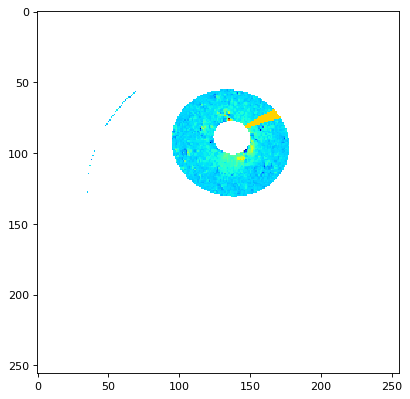

In [62]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(im1)
plt.set_cmap('jet')
plt.show()

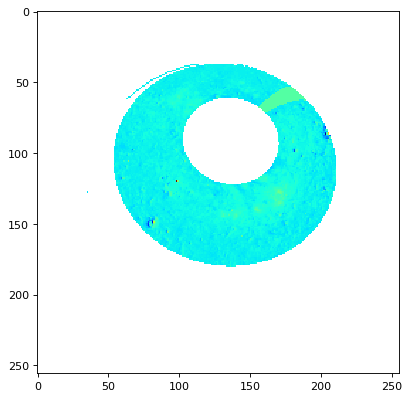

In [63]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(im2)
plt.set_cmap('jet')
plt.show()

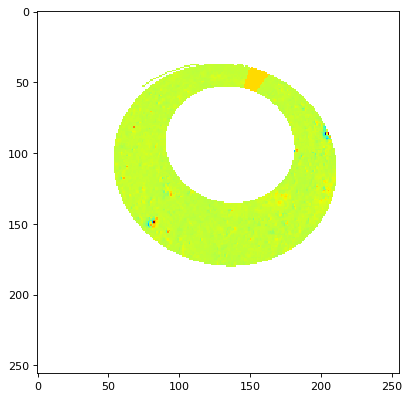

In [64]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(im3)
plt.set_cmap('jet')
plt.show()

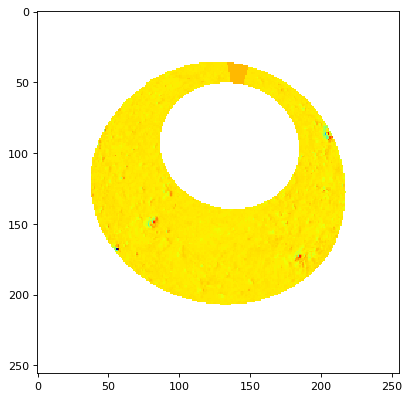

In [65]:
plt.figure(figsize=(14, 6), dpi=80)
plt.imshow(im4)
plt.set_cmap('jet')
plt.show()

In [79]:
image_time = np.array([4+50/60, 5+7/60, 5+24/60, 5+41/60])

In [86]:
from scipy.optimize import curve_fit

def f(x, A, B):
    return A*x + B

A,B = curve_fit(f, image_time, center)[0]

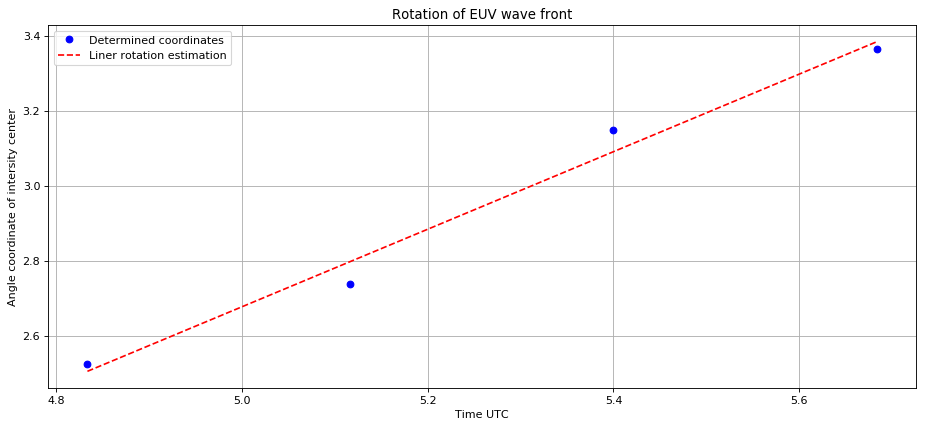

In [90]:
# Plot center
plt.figure(figsize=(14, 6), dpi=80)
plt.plot(image_time, center, 'bo', label='Determined coordinates')
plt.plot(image_time, f(image_time, A, B), 'r--', label='Liner rotation estimation')

plt.grid()
plt.title('Rotation of EUV wave front')
plt.legend()
plt.xlabel('Time UTC')
plt.ylabel('Angle coordinate of intersity center')
plt.show()

In [101]:
print('Rotation of EUV seems to be linear in the given interval of time. Speed of rotation is', int(360/(2*np.pi)*A), 'degrees per hour.')

Rotation of EUV seems to be linear in the given interval of time. Speed of rotation is 59 degrees per hour.


## Conclusion
The rotation of EUV wave front was detected. Angular velocity of EUV wave in the solar corona was also detected by processing solar images. The rotation was linear in the given interval of time with speed of 59 degrees per hour.